In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
data = pd.read_csv('Energy_consumption.csv')
data.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.14,43.43,1565.69,5,On,Off,2.77,Monday,No,75.36
1,2022-01-01 01:00:00,27.73,54.23,1411.06,1,On,On,21.83,Saturday,No,83.40
2,2022-01-01 02:00:00,28.70,58.91,1755.72,2,Off,Off,6.76,Sunday,No,78.27
3,2022-01-01 03:00:00,20.08,50.37,1452.32,1,Off,On,8.62,Wednesday,No,56.52
4,2022-01-01 04:00:00,23.10,51.40,1094.13,9,On,Off,3.07,Friday,No,70.81


In [3]:
data.shape

(1000, 11)

In [4]:
data.isna().sum()

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [6]:
data.Timestamp = pd.to_datetime(data.Timestamp)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          1000 non-null   datetime64[ns]
 1   Temperature        1000 non-null   float64       
 2   Humidity           1000 non-null   float64       
 3   SquareFootage      1000 non-null   float64       
 4   Occupancy          1000 non-null   int64         
 5   HVACUsage          1000 non-null   object        
 6   LightingUsage      1000 non-null   object        
 7   RenewableEnergy    1000 non-null   float64       
 8   DayOfWeek          1000 non-null   object        
 9   Holiday            1000 non-null   object        
 10  EnergyConsumption  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 86.1+ KB


In [7]:
data.Timestamp.max(), data.Timestamp.min()

(Timestamp('2022-02-11 15:00:00'), Timestamp('2022-01-01 00:00:00'))

## EDA

## UNIVARIATE

In [8]:
num_cols = data.select_dtypes(include='number')
num_cols

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
0,25.14,43.43,1565.69,5,2.77,75.36
1,27.73,54.23,1411.06,1,21.83,83.40
2,28.70,58.91,1755.72,2,6.76,78.27
3,20.08,50.37,1452.32,1,8.62,56.52
4,23.10,51.40,1094.13,9,3.07,70.81
...,...,...,...,...,...,...
995,28.62,48.85,1080.09,5,21.19,82.31
996,23.84,47.26,1705.24,4,25.75,66.58
997,23.01,48.72,1320.29,6,0.30,72.75
998,25.14,31.31,1309.08,3,20.43,76.95


In [9]:
def var_dist(value):
    plt.figure()
    sns.histplot(value)
    plt.show()

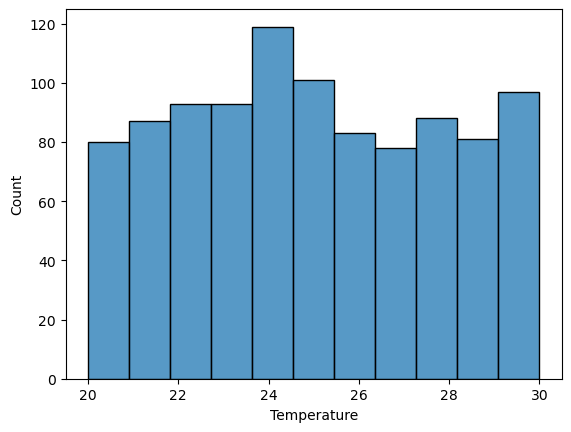

In [10]:
var_dist(data.Temperature)

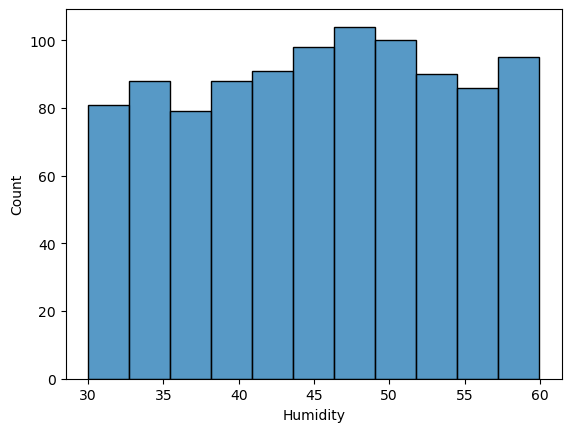

In [11]:
var_dist(data.Humidity)

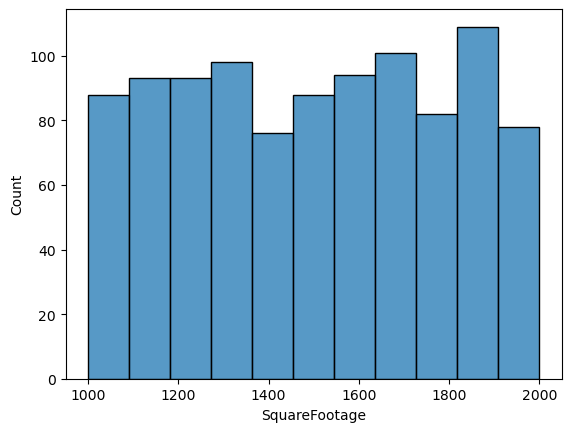

In [12]:
var_dist(data.SquareFootage)

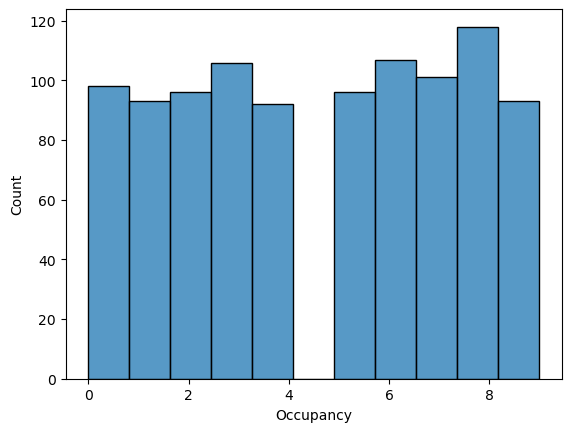

In [13]:
var_dist(data.Occupancy)

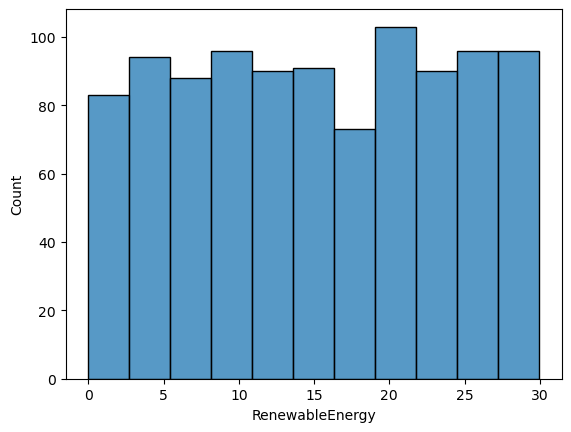

In [14]:
var_dist(data.RenewableEnergy)

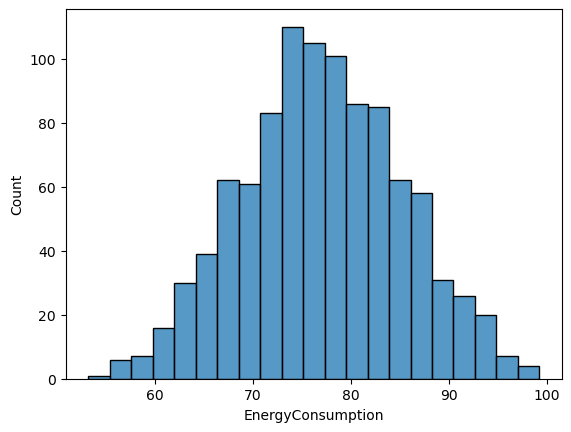

In [15]:
var_dist(data.EnergyConsumption)

In [16]:
cat_cols = data.select_dtypes(include='object')
cat_cols

,HVACUsage,LightingUsage,DayOfWeek,Holiday
0,On,Off,Monday,No
1,On,On,Saturday,No
2,Off,Off,Sunday,No
3,Off,On,Wednesday,No
4,On,Off,Friday,No
...,...,...,...,...
995,Off,Off,Saturday,No
996,Off,On,Tuesday,Yes
997,Off,On,Friday,Yes
998,On,Off,Thursday,Yes


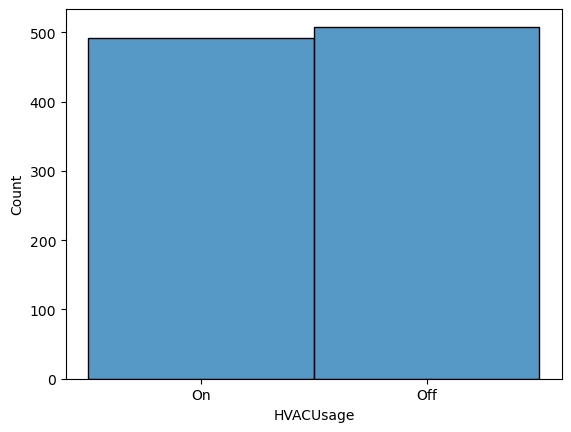

In [17]:
var_dist(data.HVACUsage)

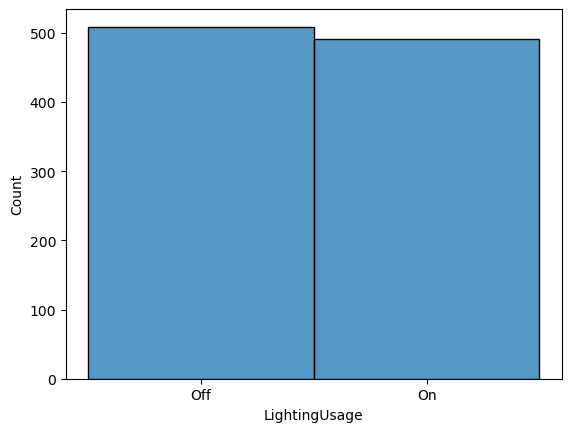

In [18]:
var_dist(data.LightingUsage)

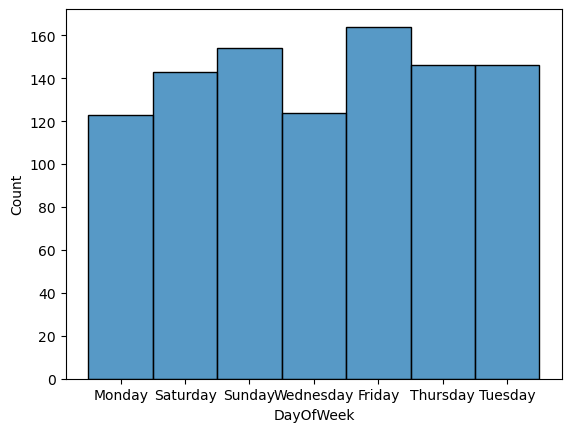

In [19]:
var_dist(data.DayOfWeek)

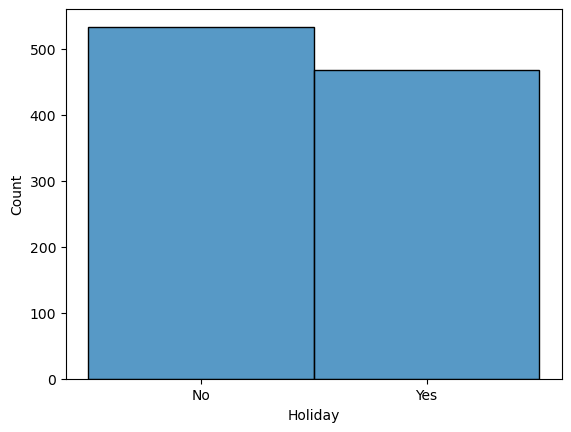

In [20]:
var_dist(data.Holiday)

## BIVARIATE

Energy consumption is the target variable

In [21]:
num_cols

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
0,25.14,43.43,1565.69,5,2.77,75.36
1,27.73,54.23,1411.06,1,21.83,83.40
2,28.70,58.91,1755.72,2,6.76,78.27
3,20.08,50.37,1452.32,1,8.62,56.52
4,23.10,51.40,1094.13,9,3.07,70.81
...,...,...,...,...,...,...
995,28.62,48.85,1080.09,5,21.19,82.31
996,23.84,47.26,1705.24,4,25.75,66.58
997,23.01,48.72,1320.29,6,0.30,72.75
998,25.14,31.31,1309.08,3,20.43,76.95


In [22]:
def num_plots(x,y):
    plt.figure()
    sns.scatterplot(x=x,y=y)
    plt.show()

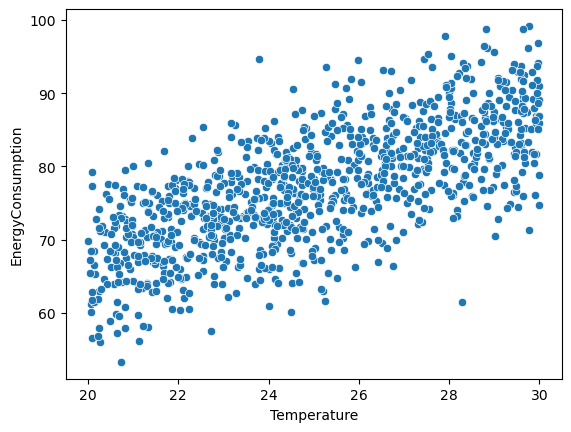

In [23]:
num_plots(x=data.Temperature, y=data.EnergyConsumption)

The higher the temp the higher the consumption

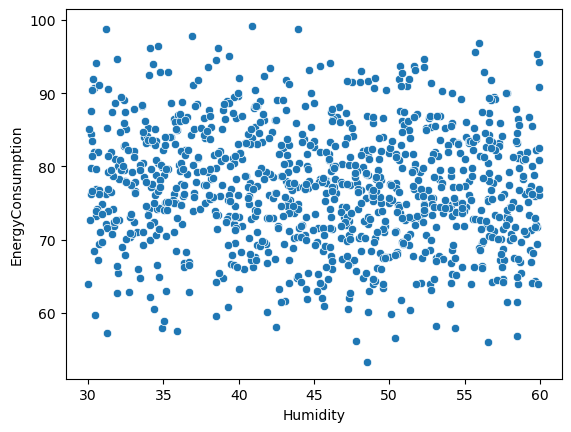

In [24]:
num_plots(x=data.Humidity, y=data.EnergyConsumption)

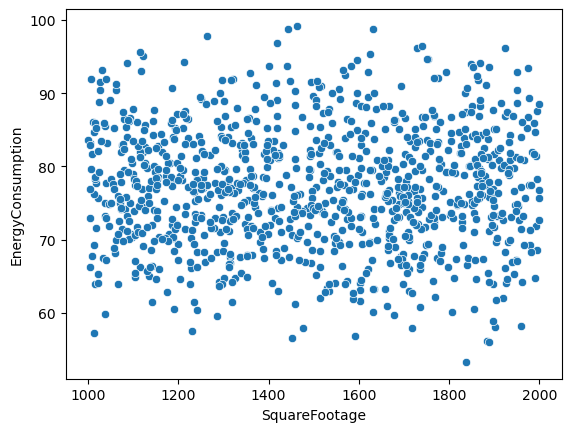

In [25]:
num_plots(x=data.SquareFootage, y=data.EnergyConsumption)

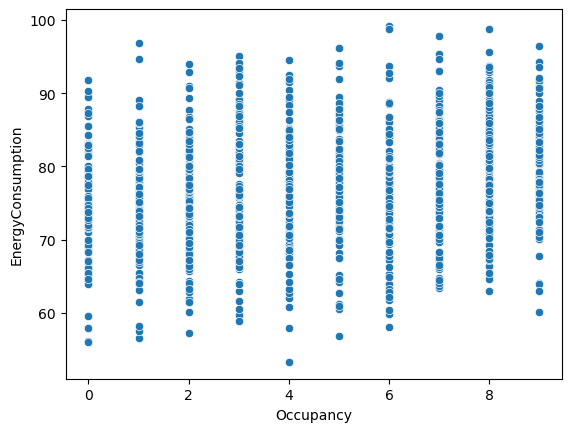

In [26]:
num_plots(x=data.Occupancy, y=data.EnergyConsumption)

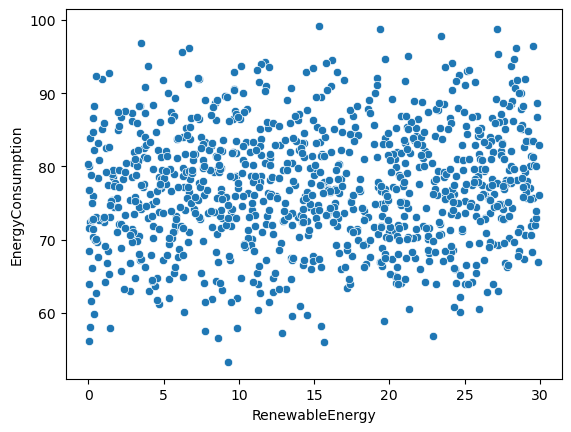

In [27]:
num_plots(x=data.RenewableEnergy, y=data.EnergyConsumption)

In [28]:
cat_cols

,HVACUsage,LightingUsage,DayOfWeek,Holiday
0,On,Off,Monday,No
1,On,On,Saturday,No
2,Off,Off,Sunday,No
3,Off,On,Wednesday,No
4,On,Off,Friday,No
...,...,...,...,...
995,Off,Off,Saturday,No
996,Off,On,Tuesday,Yes
997,Off,On,Friday,Yes
998,On,Off,Thursday,Yes


In [29]:
def cat_plots(x,y):
    plt.figure()
    sns.boxplot(x=x,y=y)
    plt.show()

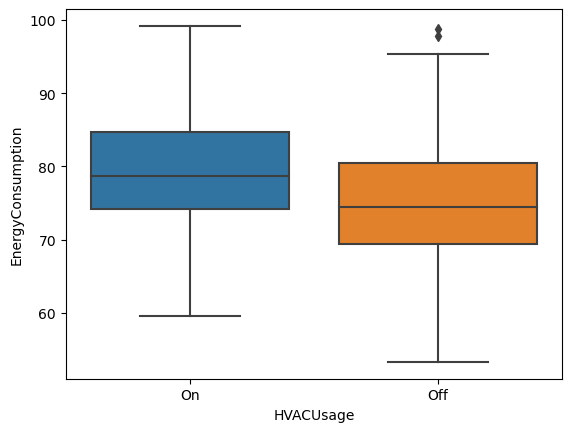

In [30]:
cat_plots(x=data.HVACUsage, y=data.EnergyConsumption)

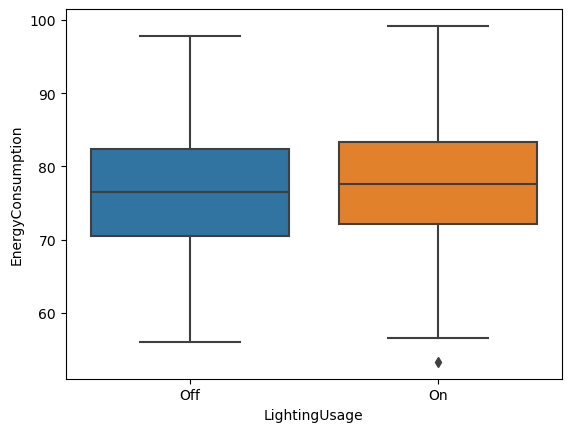

In [31]:
cat_plots(x=data.LightingUsage, y=data.EnergyConsumption)

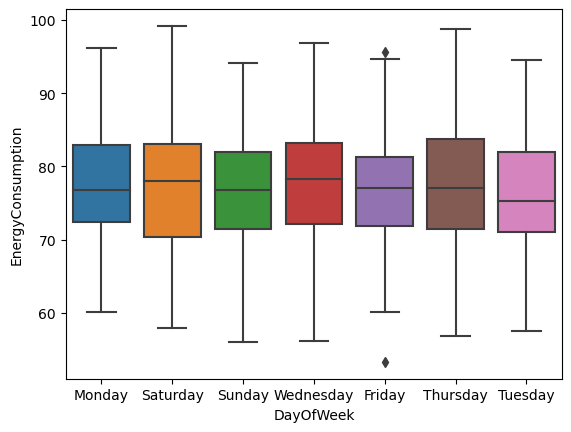

In [32]:
cat_plots(x=data.DayOfWeek, y=data.EnergyConsumption)

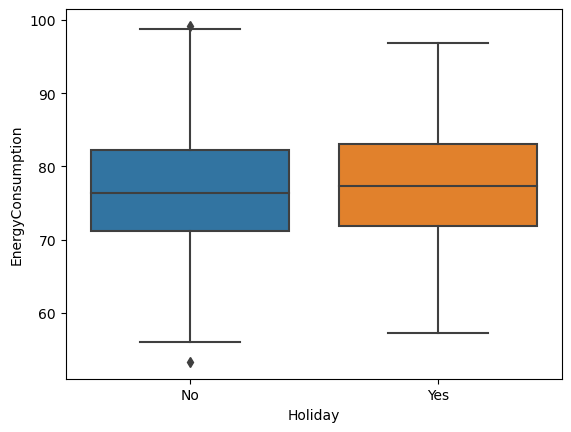

In [33]:
cat_plots(x=data.Holiday, y=data.EnergyConsumption)

## Data Transformation

In [34]:
df = data.copy()

In [35]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.14,43.43,1565.69,5,On,Off,2.77,Monday,No,75.36
1,2022-01-01 01:00:00,27.73,54.23,1411.06,1,On,On,21.83,Saturday,No,83.40
2,2022-01-01 02:00:00,28.70,58.91,1755.72,2,Off,Off,6.76,Sunday,No,78.27
3,2022-01-01 03:00:00,20.08,50.37,1452.32,1,Off,On,8.62,Wednesday,No,56.52
4,2022-01-01 04:00:00,23.10,51.40,1094.13,9,On,Off,3.07,Friday,No,70.81


In [36]:
df['Date'] = df['Timestamp'].dt.date
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = df['Timestamp'].dt.hour
df['Hour'] = df['Hour'].astype('category')
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Date,Hour
0,2022-01-01 00:00:00,25.14,43.43,1565.69,5,On,Off,2.77,Monday,No,75.36,2022-01-01,0
1,2022-01-01 01:00:00,27.73,54.23,1411.06,1,On,On,21.83,Saturday,No,83.40,2022-01-01,1
2,2022-01-01 02:00:00,28.70,58.91,1755.72,2,Off,Off,6.76,Sunday,No,78.27,2022-01-01,2
3,2022-01-01 03:00:00,20.08,50.37,1452.32,1,Off,On,8.62,Wednesday,No,56.52,2022-01-01,3
4,2022-01-01 04:00:00,23.10,51.40,1094.13,9,On,Off,3.07,Friday,No,70.81,2022-01-01,4


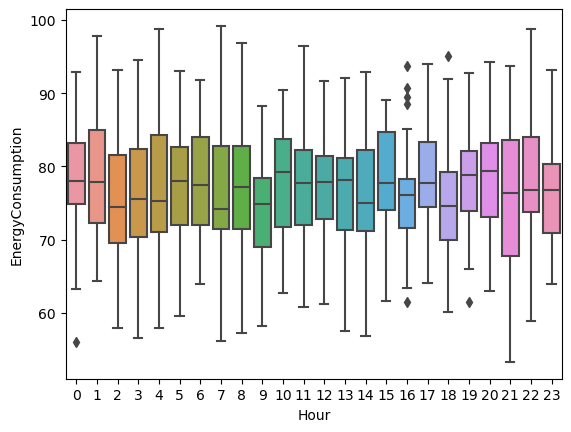

In [37]:
cat_plots(x=df.Hour, y=df.EnergyConsumption)

In [38]:
# Define the bin edges
hour_bins = [float('-inf'), 4,8,12,16,20, float('inf')]

# Create the bin labels
labels = ['WitchingHour','EarlyMorning','MidMorning', 'Afternoon', 'Evening','Night']

# Add a new column with the bin labels
df['DaySection'] = pd.cut(df['Hour'], bins=hour_bins, labels=labels)
df['DaySection'] = df['DaySection'].astype('category')

df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Date,Hour,DaySection
0,2022-01-01 00:00:00,25.14,43.43,1565.69,5,On,Off,2.77,Monday,No,75.36,2022-01-01,0,WitchingHour
1,2022-01-01 01:00:00,27.73,54.23,1411.06,1,On,On,21.83,Saturday,No,83.40,2022-01-01,1,WitchingHour
2,2022-01-01 02:00:00,28.70,58.91,1755.72,2,Off,Off,6.76,Sunday,No,78.27,2022-01-01,2,WitchingHour
3,2022-01-01 03:00:00,20.08,50.37,1452.32,1,Off,On,8.62,Wednesday,No,56.52,2022-01-01,3,WitchingHour
4,2022-01-01 04:00:00,23.10,51.40,1094.13,9,On,Off,3.07,Friday,No,70.81,2022-01-01,4,WitchingHour


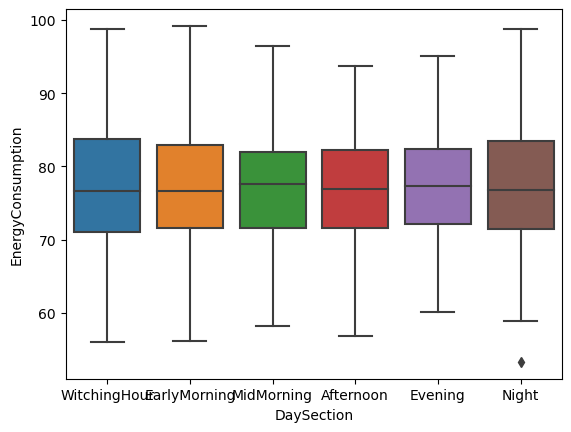

In [39]:
cat_plots(x=df.DaySection, y=df.EnergyConsumption)

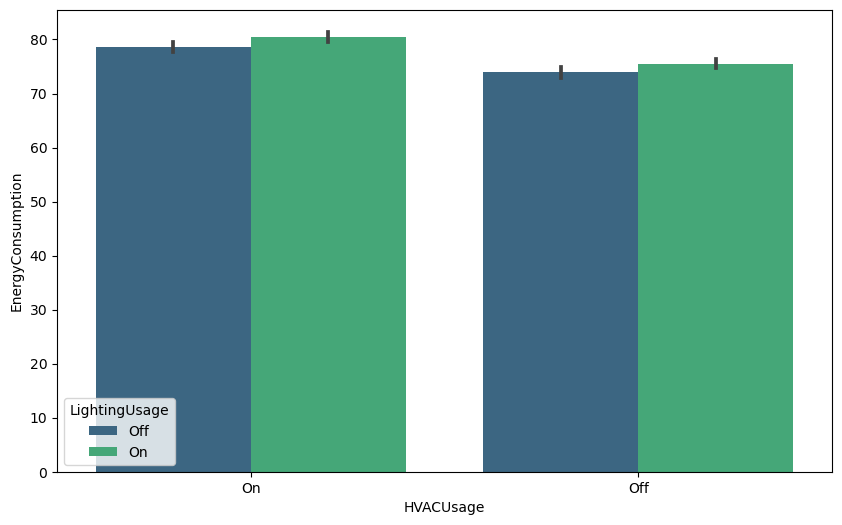

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='HVACUsage', y='EnergyConsumption', hue='LightingUsage', data=df, palette='viridis')
plt.show()

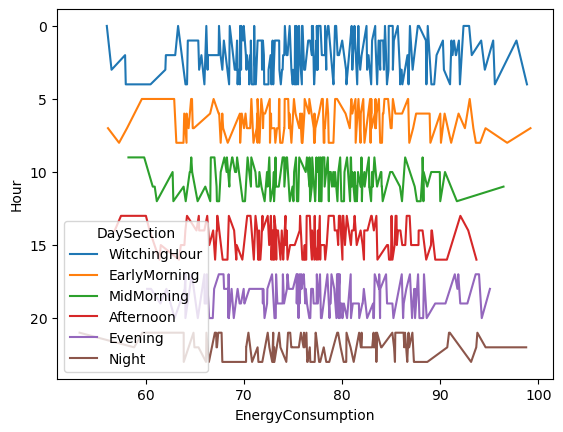

In [41]:
plt.figure()
sns.lineplot(x=df.EnergyConsumption, y=df.Hour, hue=df.DaySection)
plt.show()

Enegry consumption is equally distributed

## FEATURE SELECTION

In [42]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Date,Hour,DaySection
0,2022-01-01 00:00:00,25.14,43.43,1565.69,5,On,Off,2.77,Monday,No,75.36,2022-01-01,0,WitchingHour
1,2022-01-01 01:00:00,27.73,54.23,1411.06,1,On,On,21.83,Saturday,No,83.40,2022-01-01,1,WitchingHour
2,2022-01-01 02:00:00,28.70,58.91,1755.72,2,Off,Off,6.76,Sunday,No,78.27,2022-01-01,2,WitchingHour
3,2022-01-01 03:00:00,20.08,50.37,1452.32,1,Off,On,8.62,Wednesday,No,56.52,2022-01-01,3,WitchingHour
4,2022-01-01 04:00:00,23.10,51.40,1094.13,9,On,Off,3.07,Friday,No,70.81,2022-01-01,4,WitchingHour


In [43]:
list = ['HVACUsage','LightingUsage','DayOfWeek','Holiday']

df[list] = df[list].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          1000 non-null   datetime64[ns]
 1   Temperature        1000 non-null   float64       
 2   Humidity           1000 non-null   float64       
 3   SquareFootage      1000 non-null   float64       
 4   Occupancy          1000 non-null   int64         
 5   HVACUsage          1000 non-null   category      
 6   LightingUsage      1000 non-null   category      
 7   RenewableEnergy    1000 non-null   float64       
 8   DayOfWeek          1000 non-null   category      
 9   Holiday            1000 non-null   category      
 10  EnergyConsumption  1000 non-null   float64       
 11  Date               1000 non-null   datetime64[ns]
 12  Hour               1000 non-null   category      
 13  DaySection         1000 non-null   category      
dtypes: catego

In [44]:

import catboost
from catboost import CatBoostRegressor
import pandas as pd



X = df.drop('EnergyConsumption', axis=1)
y = df['EnergyConsumption']

categorical_features = ['HVACUsage','LightingUsage','DayOfWeek','Holiday','Hour','DaySection']

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=100, depth=10, learning_rate=0.05, loss_function='RMSE', random_seed=42,cat_features=categorical_features)

# Fit the model
model.fit(X, y)

# Get feature importance scores
feature_importance = model.get_feature_importance()

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance
print(feature_importance_df)

# Select top features based on a threshold or a specific number
top_features = feature_importance_df.head(10)['Feature'].tolist()  # Adjust the number as needed

# Subset the DataFrame with the top features
X_selected = X[top_features]




0:	learn: 7.9743948	total: 213ms	remaining: 21.1s
1:	learn: 7.8291405	total: 283ms	remaining: 13.9s
2:	learn: 7.6592633	total: 332ms	remaining: 10.7s
3:	learn: 7.4873693	total: 405ms	remaining: 9.71s
4:	learn: 7.3475170	total: 491ms	remaining: 9.33s
5:	learn: 7.2319976	total: 572ms	remaining: 8.96s
6:	learn: 7.1162537	total: 645ms	remaining: 8.56s
7:	learn: 6.9798613	total: 674ms	remaining: 7.75s
8:	learn: 6.8527986	total: 750ms	remaining: 7.58s
9:	learn: 6.7138336	total: 828ms	remaining: 7.45s
10:	learn: 6.6012599	total: 901ms	remaining: 7.29s
11:	learn: 6.4849779	total: 982ms	remaining: 7.2s
12:	learn: 6.3815474	total: 1.06s	remaining: 7.13s
13:	learn: 6.2698357	total: 1.14s	remaining: 7.02s
14:	learn: 6.1581325	total: 1.22s	remaining: 6.91s
15:	learn: 6.0782740	total: 1.29s	remaining: 6.79s
16:	learn: 5.9851310	total: 1.36s	remaining: 6.64s
17:	learn: 5.8969745	total: 1.42s	remaining: 6.48s
18:	learn: 5.8195233	total: 1.5s	remaining: 6.39s
19:	learn: 5.7406324	total: 1.57s	remaining

use all but hour

In [45]:
top_features = X.drop('Hour',axis=1)
top_features = top_features.columns.to_list()
top_features

['Timestamp',
 'Temperature',
 'Humidity',
 'SquareFootage',
 'Occupancy',
 'HVACUsage',
 'LightingUsage',
 'RenewableEnergy',
 'DayOfWeek',
 'Holiday',
 'Date',
 'DaySection']

C:\Users\Michelle.Gitau\AppData\Local\Temp\ipykernel_15152\1173716289.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[top_features].corr(), annot=True)


<Axes: >

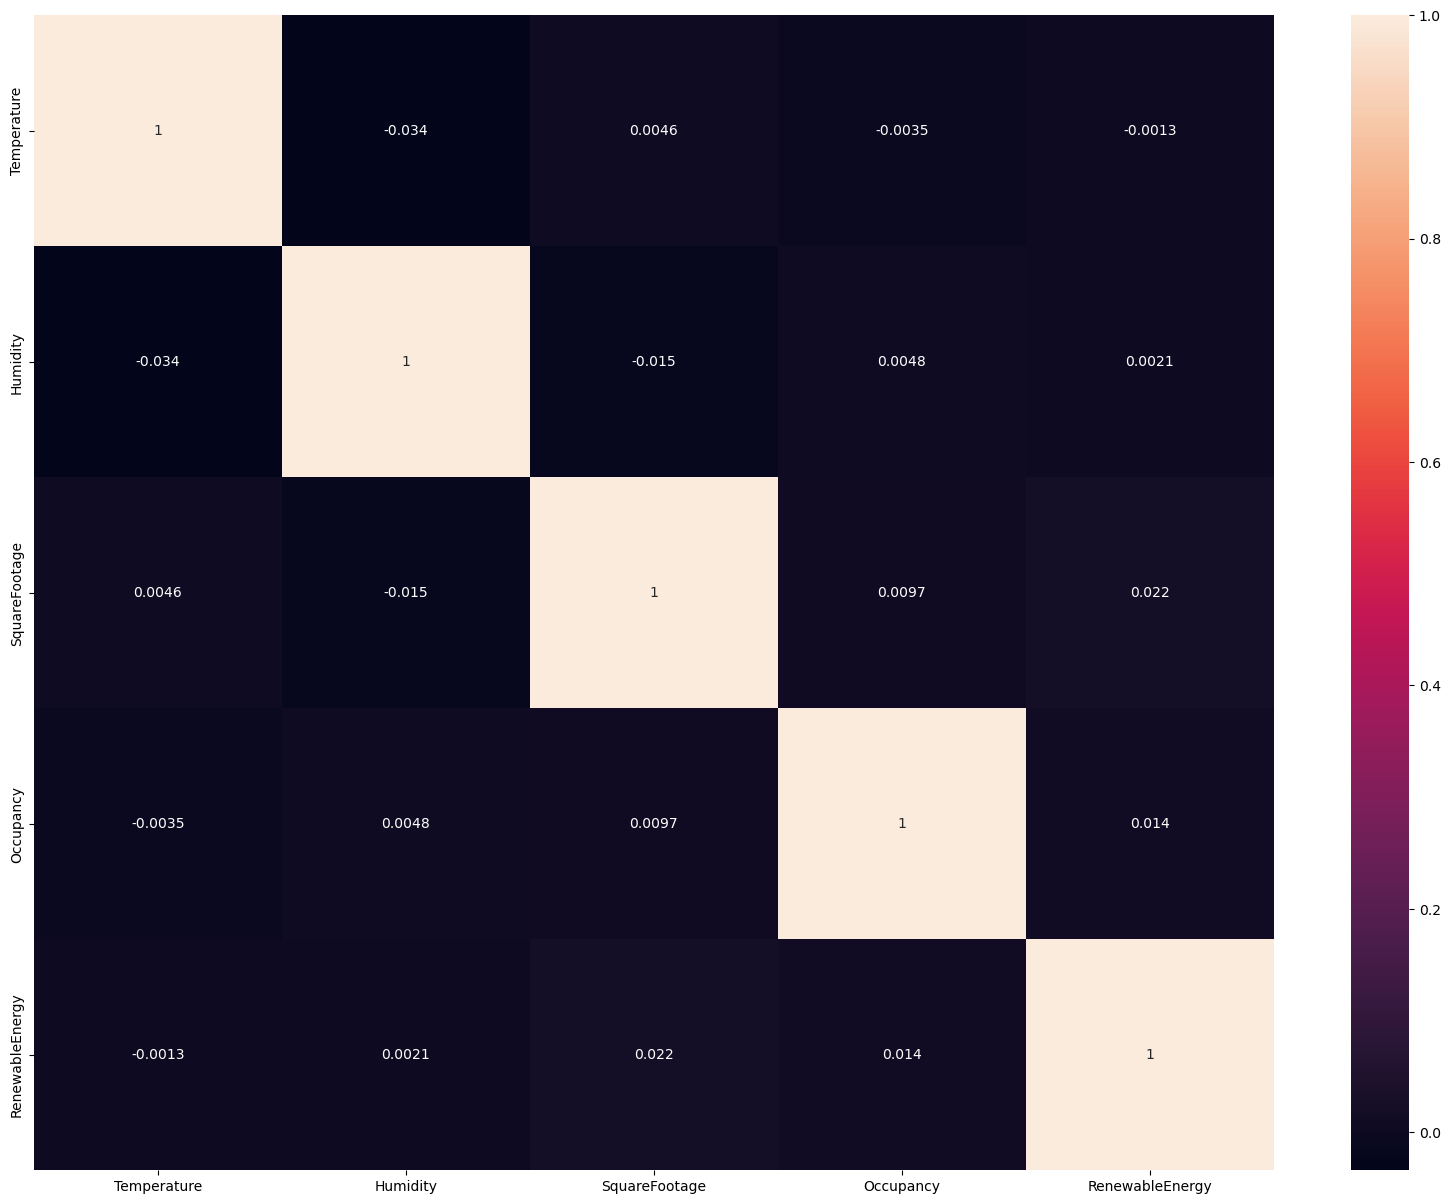

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
sns.heatmap(df[top_features].corr(), annot=True)

## Model

In [47]:
# Calculate the number of rows for the training and test sets

train_size = int(0.90 * len(df))
test_size = len(df) - train_size

# Sample the training set
train_df = df.sample(n=train_size, random_state=42)

# Sample the test set (exclude the rows already in the training set)
test_df = df.drop(train_df.index).sample(n=test_size, random_state=42)

train_df.shape, test_df.shape

((900, 14), (100, 14))

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'target_column' is the column containing the target variable

# Split the DataFrame into features (X) and target (y)
X = train_df.drop('EnergyConsumption', axis=1)
y = train_df[['EnergyConsumption']]

# Perform the train-test split with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((720, 13), (180, 13), (720, 1), (180, 1))

In [49]:
from catboost import CatBoostClassifier, CatBoostRegressor

# train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features)
# val_pool = Pool(data=X_val, label=y_val, cat_features=categorical_features)


# Initialize the CatBoostClassifier

clf = CatBoostRegressor(depth= 5,
                         iterations = 350,       # Max 550-600
                         l2_leaf_reg = 5, 
                         learning_rate= 0.007,     # 0.1 - 0.0009
                         subsample=0.7,        # 0.1 - 0.9
#                          loss_function='RMSE',
                         random_seed=42,
                         eval_metric="R2"
                        )

clfmodel = clf.fit(X_train[top_features], y_train,
                   cat_features=X_train[top_features].select_dtypes(include='category').columns.tolist(),
                   verbose=False, 
                   eval_set=(X_test[top_features], y_test),
                   plot=True,
                   early_stopping_rounds=50,
                  )

# best_model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=50, verbose=False)
# model = CatBoostClassifier()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [58]:
# import pickle

# # Save the trained model to a pickle file

# filename = 'energy_consumption_model.pkl'
# with open(filename, 'wb') as file:
#     pickle.dump(clfmodel, file)

In [50]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Make predictions on the training and test sets
y_train_pred = clfmodel.predict(X_train[top_features])
y_test_pred = clfmodel.predict(X_test[top_features])

# Calculate the performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the performance metrics
print("Training set:")
print("Mean Squared Error: ", train_mse)
print("R^2 Score: ", train_r2)

print("\nTest set:")
print("Mean Squared Error: ", test_mse)
print("R^2 Score: ", test_r2)


Training set:
Mean Squared Error:  26.137692023499742
R^2 Score:  0.6061284309578169

Test set:
Mean Squared Error:  28.970113136769466
R^2 Score:  0.5016326383644


## Test Data

In [51]:
test_df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Date,Hour,DaySection
805,2022-02-03 13:00:00,26.09,53.96,1722.18,9,On,Off,19.67,Wednesday,No,74.24,2022-02-03,13,Afternoon
476,2022-01-20 20:00:00,23.36,34.59,1693.34,1,Off,Off,25.09,Wednesday,No,66.46,2022-01-20,20,Evening
663,2022-01-28 15:00:00,28.91,52.56,1533.73,2,Off,Off,15.95,Friday,No,76.84,2022-01-28,15,Afternoon
427,2022-01-18 19:00:00,27.12,57.19,1992.62,0,Off,Off,8.45,Saturday,No,81.39,2022-01-18,19,Evening
413,2022-01-18 05:00:00,25.04,44.50,1493.82,5,On,On,22.55,Saturday,No,81.68,2022-01-18,5,EarlyMorning


In [52]:
# test_df

test_data = test_df.drop('EnergyConsumption', axis=1)
print('test size:  ', test_data.shape)

test_labels = test_df['EnergyConsumption']


test size:   (100, 13)


In [53]:
new_x = test_df[top_features]
new_y = test_df['EnergyConsumption']

In [54]:
predictions = clfmodel.predict(new_x)

In [55]:
compare = test_df[['EnergyConsumption']]
compare['Predictions'] = predictions
compare.sample(5)

C:\Users\Michelle.Gitau\AppData\Local\Temp\ipykernel_15152\1501769483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare['Predictions'] = predictions


,EnergyConsumption,Predictions
201,74.38,72.78
992,93.64,81.75
955,82.11,72.53
562,69.11,73.07
818,70.21,74.45


In [56]:
compare['Deviation'] = (compare.EnergyConsumption - compare.Predictions).abs()
compare.head()

C:\Users\Michelle.Gitau\AppData\Local\Temp\ipykernel_15152\2239201157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare['Deviation'] = (compare.EnergyConsumption - compare.Predictions).abs()


,EnergyConsumption,Predictions,Deviation
805,74.24,82.19,7.94
476,66.46,71.78,5.32
663,76.84,80.98,4.15
427,81.39,77.41,3.97
413,81.68,79.26,2.41


In [57]:
compare.describe()

,EnergyConsumption,Predictions,Deviation
count,100.00,100.00,100.00
mean,77.50,77.19,4.36
std,8.98,5.20,3.53
min,56.04,67.49,0.06
25%,71.13,72.82,1.81
50%,77.24,77.15,3.58
75%,83.49,81.72,6.84
max,96.13,85.58,16.84
